Observed sequences (1=head, 0=tail):
[[1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 1 0 1 0]
 [1 0 0 0 1 1 1 1 1 1]]

=== Iteration 1 ===
 Heads   Tails  Likelihood A  Likelihood B  Prob(Coin A)  Prob(Coin B)    H/T to Coin A    H/T to Coin B
    10       0  6.046618e-03  9.765625e-04      0.860952      0.139048  8.610H 0.000T  1.390H 0.000T
     8       2  2.687386e-03  9.765625e-04      0.733467      0.266533  5.868H 1.467T  2.132H 0.533T
     3       7  3.538944e-04  9.765625e-04      0.265995      0.734005  0.798H 1.862T  2.202H 5.138T
     7       3  1.791590e-03  9.765625e-04      0.647215      0.352785  4.531H 1.942T  2.469H 1.058T
Updated θ_A = 0.7898, θ_B = 0.5491

=== Iteration 2 ===
 Heads   Tails  Likelihood A  Likelihood B  Prob(Coin A)  Prob(Coin B)    H/T to Coin A    H/T to Coin B
    10       0  9.446683e-02  2.490730e-03      0.974311      0.025689  9.743H 0.000T  0.257H 0.000T
     8       2  6.689716e-03  1.679838e-03      0.799292      0.200708  6.394H

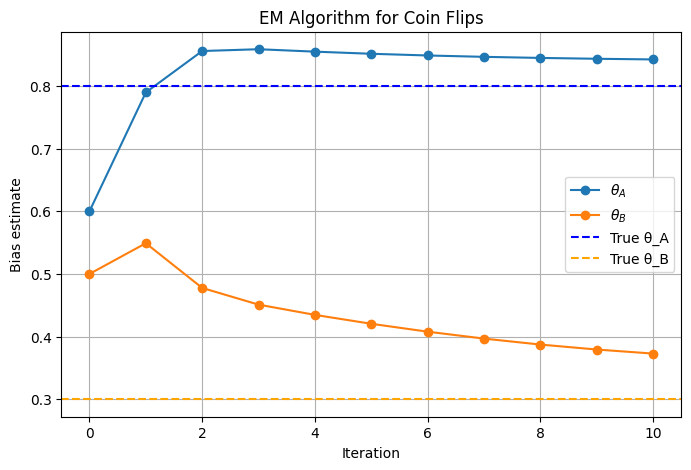

In [7]:
# https://www.youtube.com/watch?v=3oefV-AoP0E
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Generate synthetic data
# -------------------------------
np.random.seed(42)

# True biases of coins
theta_A_true = 0.8
theta_B_true = 0.3

# Number of trials and flips per trial
n_trials = 4
n_flips = 10

# Generate sequences
data = []
for _ in range(n_trials):
    coin = np.random.choice(['A', 'B'])  # hidden coin
    if coin == 'A':
        flips = np.random.binomial(1, theta_A_true, n_flips)
    else:
        flips = np.random.binomial(1, theta_B_true, n_flips)
    data.append(flips)

data = np.array(data)
print("Observed sequences (1=head, 0=tail):")
print(data)

# ----------------------------------------
# Initialize parameters for the EM
# ----------------------------------------
theta_A = 0.6
theta_B = 0.5

theta_A_list = [theta_A]
theta_B_list = [theta_B]

# ----------------------------------------
# EM Algorithm with detailed output
# ----------------------------------------
n_iterations = 10

for iteration in range(1, n_iterations + 1):
    responsibilities_A = []
    responsibilities_B = []
    
    print(f"\n=== Iteration {iteration} ===")
    print(f"{'Heads':>6}  {'Tails':>6}  {'Likelihood A':>12}  {'Likelihood B':>12}  {'Prob(Coin A)':>12}  {'Prob(Coin B)':>12}  {'H/T to Coin A':>15}  {'H/T to Coin B':>15}")
    
    for flips in data:
        heads = np.sum(flips)
        tails = n_flips - heads
        
        # Likelihood of this sequence given each coin
        prob_A = (theta_A ** heads) * ((1 - theta_A) ** tails)
        prob_B = (theta_B ** heads) * ((1 - theta_B) ** tails)
        
        # Responsibilities
        total = prob_A + prob_B
        weight_A = prob_A / total
        weight_B = prob_B / total
        
        responsibilities_A.append(weight_A)
        responsibilities_B.append(weight_B)
        
        # Weighted heads/tails for this sequence
        h_a = weight_A * heads
        t_a = weight_A * tails
        h_b = weight_B * heads
        t_b = weight_B * tails
        
        print(f"{heads:6}  {tails:6}  {prob_A:12.6e}  {prob_B:12.6e}  {weight_A:12.6f}  {weight_B:12.6f}  {h_a:.3f}H {t_a:.3f}T  {h_b:.3f}H {t_b:.3f}T")
    
    responsibilities_A = np.array(responsibilities_A)
    responsibilities_B = np.array(responsibilities_B)
    
    # Update θ_A and θ_B
    weighted_heads_A = np.sum(responsibilities_A * np.sum(data, axis=1))
    weighted_tails_A = np.sum(responsibilities_A * (n_flips - np.sum(data, axis=1)))
    theta_A = weighted_heads_A / (weighted_heads_A + weighted_tails_A)
    
    weighted_heads_B = np.sum(responsibilities_B * np.sum(data, axis=1))
    weighted_tails_B = np.sum(responsibilities_B * (n_flips - np.sum(data, axis=1)))
    theta_B = weighted_heads_B / (weighted_heads_B + weighted_tails_B)
    
    theta_A_list.append(theta_A)
    theta_B_list.append(theta_B)
    
    print(f"Updated θ_A = {theta_A:.4f}, θ_B = {theta_B:.4f}")

# ----------------------------------------
# Visualization
# ----------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(theta_A_list, marker='o', label=r"$\theta_A$")
plt.plot(theta_B_list, marker='o', label=r"$\theta_B$")
plt.axhline(theta_A_true, color='blue', linestyle='--', label="True θ_A")
plt.axhline(theta_B_true, color='orange', linestyle='--', label="True θ_B")
plt.xlabel("Iteration")
plt.ylabel("Bias estimate")
plt.title("EM Algorithm for Coin Flips")
plt.legend()
plt.grid(True)
plt.show()
